In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import scipy.io as scipy
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import scipy.optimize as opt

In [2]:
df = pd.read_csv("Downloads/ex2data2.csv", sep=',')

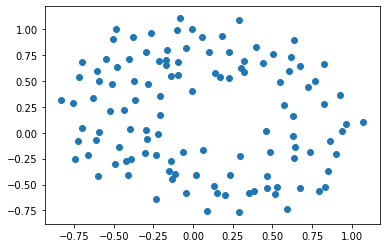

In [36]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [11]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values
print(X, y)

[[-0.092742   0.68494  ]
 [-0.21371    0.69225  ]
 [-0.375      0.50219  ]
 [-0.51325    0.46564  ]
 [-0.52477    0.2098   ]
 [-0.39804    0.034357 ]
 [-0.30588   -0.19225  ]
 [ 0.016705  -0.40424  ]
 [ 0.13191   -0.51389  ]
 [ 0.38537   -0.56506  ]
 [ 0.52938   -0.5212   ]
 [ 0.63882   -0.24342  ]
 [ 0.73675   -0.18494  ]
 [ 0.54666    0.48757  ]
 [ 0.322      0.5826   ]
 [ 0.16647    0.53874  ]
 [-0.046659   0.81652  ]
 [-0.17339    0.69956  ]
 [-0.47869    0.63377  ]
 [-0.60541    0.59722  ]
 [-0.62846    0.33406  ]
 [-0.59389    0.005117 ]
 [-0.42108   -0.27266  ]
 [-0.11578   -0.39693  ]
 [ 0.20104   -0.60161  ]
 [ 0.46601   -0.53582  ]
 [ 0.67339   -0.53582  ]
 [-0.13882    0.54605  ]
 [-0.29435    0.77997  ]
 [-0.26555    0.96272  ]
 [-0.16187    0.8019   ]
 [-0.17339    0.64839  ]
 [-0.28283    0.47295  ]
 [-0.36348    0.31213  ]
 [-0.30012    0.027047 ]
 [-0.23675   -0.21418  ]
 [-0.06394   -0.18494  ]
 [ 0.062788  -0.16301  ]
 [ 0.22984   -0.41155  ]
 [ 0.2932    -0.2288   ]


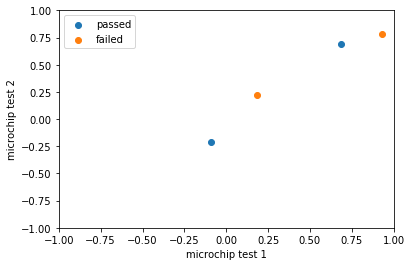

In [14]:
#plotting the data

#masking (for plotting two different variables)

mask=y==1
passed=plt.scatter(X[mask][0], X[mask][1])
failed=plt.scatter(X[~mask][0], X[~mask][1])
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xlabel('microchip test 1')
plt.ylabel('microchip test 2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [27]:
#mapfeaturing
#done so that a more accurate decision boundary can be made 
#2 features will not be sufficient as a linear boundary is not required here

def mapFeature(x1,x2):      
    degree=2                               
    out=np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,np.multiply(np.power(x1,i-j),np.power(x2,j))[:,np.newaxis]))          
    return out
x=mapFeature(df.iloc[:,0],df.iloc[:,1])

In [28]:
x

array([[ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03, -6.35227055e-02,  4.69142804e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01,
         4.56719641e-02, -1.47940747e-01,  4.79210063e-01],
       [ 1.00000000e+00, -3.75000000e-01,  5.02190000e-01,
         1.40625000e-01, -1.88321250e-01,  2.52194796e-01],
       [ 1.00000000e+00, -5.13250000e-01,  4.65640000e-01,
         2.63425562e-01, -2.38989730e-01,  2.16820610e-01],
       [ 1.00000000e+00, -5.24770000e-01,  2.09800000e-01,
         2.75383553e-01, -1.10096746e-01,  4.40160400e-02],
       [ 1.00000000e+00, -3.98040000e-01,  3.43570000e-02,
         1.58435842e-01, -1.36754603e-02,  1.18040345e-03],
       [ 1.00000000e+00, -3.05880000e-01, -1.92250000e-01,
         9.35625744e-02,  5.88054300e-02,  3.69600625e-02],
       [ 1.00000000e+00,  1.67050000e-02, -4.04240000e-01,
         2.79057025e-04, -6.75282920e-03,  1.63409978e-01],
       [ 1.00000000e+00,  1.31910000e-01, -5.138

In [29]:
#setting the parameters
lamda=1
(m,n)=x.shape
theta=np.zeros((n,1))
y=y[:,np.newaxis]

In [30]:
#defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [31]:
#defining Regularized Cost Function
def reg_costFunc(theta, x, y, lamda):
    m=len(y)
    j=(-1/m)*(y.T @ np.log(sigmoid(x@ theta)) + (1 - y.T) @ np.log(1 - sigmoid(x@ theta)))#this is different from earlier cost 
                                                                                          #besause in this case we have to 
                                                                                          #create the result in the form of an
                                                                                          #array so that it can be added to
                                                                                          #regularization term
    reg=(lamda/(2*m))*(theta[1:].T @ theta[1:])
    j=j+reg
    return j

j=reg_costFunc(theta, x, y, lamda)
print(j)

[[[0.69314718]]]


In [32]:
#defining Gradient Descent Function
def lrGradientDescent(theta, x, y, labda):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * x.T @ (sigmoid(x @ theta) - y)
    grad[1:] = grad[1:] + (lamda / m) * theta[1:]
    return grad

In [33]:
#Learning parameters using fmin_tnc
output = opt.fmin_tnc(func = reg_costFunc, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (x, y.flatten(), lamda))
theta = output[0]

print(theta)

print("\n")

j=reg_costFunc(theta, x, y, lamda)    
print(j)

[ 1.18000712  0.3411928   0.6468229  -2.74392009 -0.96005971 -2.38867868]


[[0.58365424]]


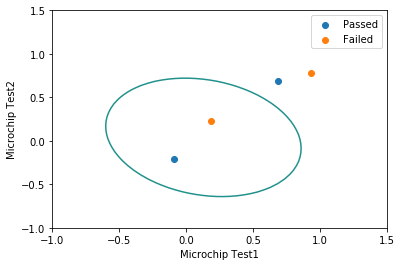

In [35]:
# making decision boundary

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(x1, x2):
    degree = 2
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(x1, i-j), np.power(x2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(mapFeatureForPlotting(u[i],v[j]),theta)

mask = y.flatten() == 1
x = df.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()
